<a href="https://colab.research.google.com/github/DajeanArcila/DajeanArcila/blob/main/Regresion_Polinomial_y_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

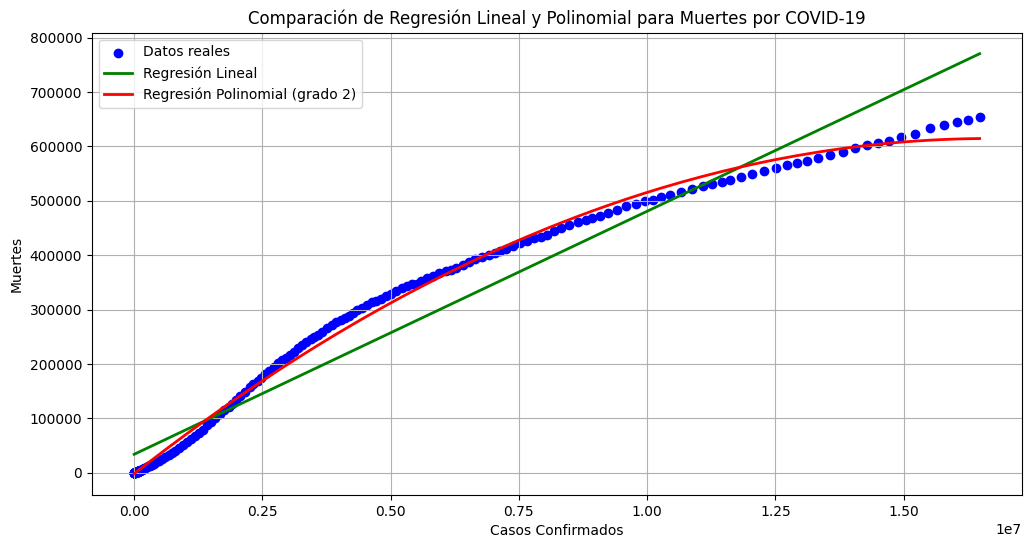

Regresión Lineal:
Coeficiente: 0.044702655359296115
Intercepto: 33767.94610053414
Regresión Polinomial:
Coeficientes: [[ 0.00000000e+00  7.38706268e-02 -2.21259651e-09]]
Intercepto: [-1979.31763691]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Cargar los datos
df = pd.read_csv('/content/covid_19_clean_complete.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Seleccionar los datos de interés
df = df.groupby('Date').sum().reset_index()

# Eliminar filas con valores nulos
df = df.dropna()

# Preparar los datos
X = df['Confirmed'].values.reshape(-1, 1)
y = df['Deaths'].values.reshape(-1, 1)

# Crear y ajustar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X, y)

# Crear y ajustar el modelo de regresión polinomial
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predicciones
y_pred_linear = linear_model.predict(X)
y_pred_poly = poly_model.predict(X_poly)

# Visualización de los datos y los modelos
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred_linear, color='green', linewidth=2, label='Regresión Lineal')
plt.plot(X, y_pred_poly, color='red', linewidth=2, label='Regresión Polinomial (grado 2)')
plt.title('Comparación de Regresión Lineal y Polinomial para Muertes por COVID-19')
plt.xlabel('Casos Confirmados')
plt.ylabel('Muertes')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los coeficientes del modelo lineal
print('Regresión Lineal:')
print(f'Coeficiente: {linear_model.coef_[0][0]}')
print(f'Intercepto: {linear_model.intercept_[0]}')

# Imprimir los coeficientes del modelo polinomial
print('Regresión Polinomial:')
print(f'Coeficientes: {poly_model.coef_}')
print(f'Intercepto: {poly_model.intercept_}')
